In [ ]:
# CS 237 Spring 2019
# Author: Alina Ene (aene@bu.edu)
# Used in L7

# CS 237: Streaks in coin tosses

In [1]:
import numpy as np                # arrays and functions which operate on array
import matplotlib.pyplot as plt   # normal plotting
import seaborn as sns             # Fancy plotting 
import pandas as pd               # Data input and manipulation

from numpy.random import seed, randint, uniform
from collections import Counter

## Distribution of the longest streak in random sequences

Here we simulate tossing a fair coin num_tosses times. We study the following random variables:
* HotHand = the length of the longest streak of Heads
* ColdHand = the length of the longest streak of Tails
* Streak = the length of the longest streak (of Heads or Tails)

In [2]:
# tosses a fair coin num_tosses times
# returns the length of the longest streak of the given face and the longest streak overall (H or T)
# face = 0 means heads, face = 1 means tails
def streak_length(num_tosses, face):
    tosses = randint(0, 2, [num_tosses]) # coin tosses
    max_streak = 0 # length of longest streak found (H or T)
    max_streak_face = 0 # length of longest streak of face
    curr_streak = 0 # length of current streak (H or T)
    curr_face = tosses[0] # the face of the current streak
    for i in range(num_tosses):
        if curr_face == tosses[i]:
            # streak continues
            curr_streak += 1
        else:
            # streak broken
            if curr_streak > max_streak:
                # update longest streak
                max_streak = curr_streak
            if curr_face == face and curr_streak > max_streak_face:
                # update longest streak of face
                max_streak_face = curr_streak
            curr_streak = 1
            curr_face = tosses[i]
    if curr_streak > max_streak:
        max_streak = curr_streak
    if curr_face == face and curr_streak > max_streak_face:
        max_streak_face = curr_streak
    return (max_streak_face, max_streak)

In [3]:
print(streak_length(10, 0))

(2, 2)


In [4]:
# plot the distribution of the random variable HotHand
def hot_hand_distribution(num_tosses, num_trials = 100000):
    results = []
    for i in range(num_trials):
        (a, b) = streak_length(num_tosses, 0)
        results.append(a)
    summary = Counter(results)
    print(summary)
    
    # plot how many times each streak length occured
    x = [i for i in range(num_tosses + 1) if not summary[i] == 0]
    y = [summary[i] for i in x]
    plt.bar(x, y)
    plt.title("Hot Hand (# tosses = " + str(num_tosses) + ", # trials = " + str(num_trials) + ")")
    plt.xticks(x, x)
    plt.xlabel("hot hand streak length")
    plt.ylabel("# occurences")
    plt.show()
    
    # plot the probability of each streak length
    y = [summary[i]/num_trials for i in x]
    plt.bar(x, y)
    plt.title("Hot Hand (# tosses = " + str(num_tosses) + ", # trials = " + str(num_trials) + ")")
    plt.xticks(x, x)
    plt.xlabel("hot hand streak length")
    plt.ylabel("probability")
    plt.show()

Counter({2: 34932, 3: 26102, 1: 14137, 4: 13662, 5: 6297, 6: 2809, 7: 1201, 8: 462, 9: 180, 10: 110, 0: 108})


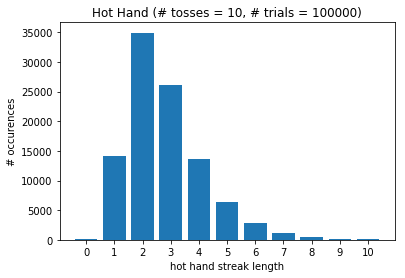

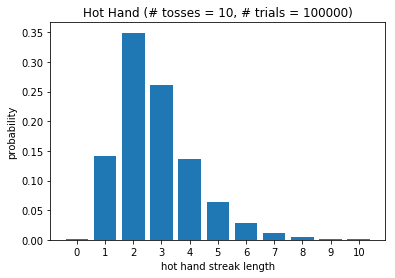

In [5]:
hot_hand_distribution(10)

Counter({4: 27133, 3: 26821, 5: 17679, 6: 9681, 2: 9027, 7: 4824, 8: 2384, 9: 1128, 10: 592, 11: 281, 1: 198, 12: 121, 13: 72, 14: 26, 15: 20, 17: 6, 16: 6, 18: 1})


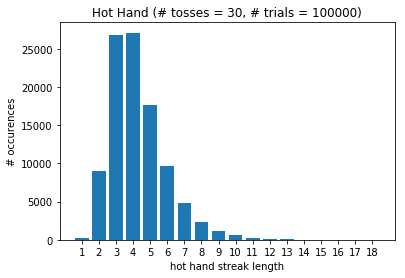

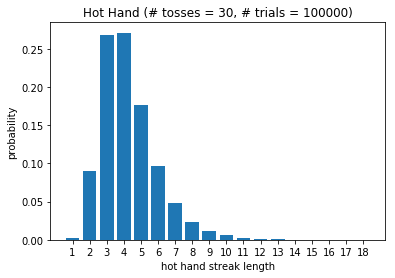

In [6]:
hot_hand_distribution(30)

Counter({4: 27626, 5: 23687, 3: 15499, 6: 14901, 7: 8121, 8: 4286, 9: 2158, 2: 1715, 10: 1030, 11: 492, 12: 265, 13: 114, 14: 54, 15: 19, 16: 17, 17: 11, 1: 3, 18: 1, 19: 1})


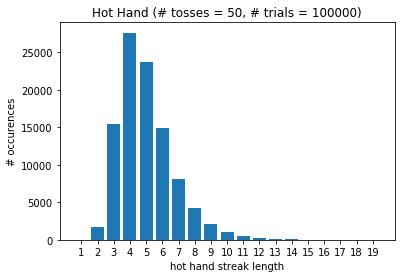

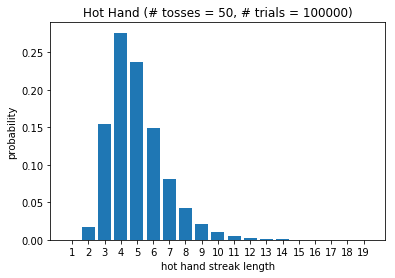

In [7]:
hot_hand_distribution(50)

In [8]:
# plot the distribution of the random variable Streak
def streak_distribution(num_tosses, num_trials = 100000):
    results = []
    for i in range(num_trials):
        (a, b) = streak_length(num_tosses, 0)
        results.append(b)
    summary = Counter(results)
    print(summary)
    
    # plot how many times each streak length occured
    x = [i for i in range(num_tosses + 1) if not summary[i] == 0]
    y = [summary[i] for i in x]
    plt.bar(x, y)
    plt.title("Streak (# tosses = " + str(num_tosses) + ", # trials = " + str(num_trials) + ")")
    plt.xticks(x, x)
    plt.xlabel("overall streak length")
    plt.ylabel("# occurences")
    plt.show()
    
    # plot the probability of each streak length
    y = [summary[i]/num_trials for i in x]
    plt.bar(x, y)
    plt.title("Streak (# tosses = " + str(num_tosses) + ", # trials = " + str(num_trials) + ")")
    plt.xticks(x, x)
    plt.xlabel("overall streak length")
    plt.ylabel("probability")
    plt.show()

Counter({3: 35998, 4: 24910, 2: 17241, 5: 12093, 6: 5533, 7: 2401, 8: 1069, 9: 372, 10: 204, 1: 179})


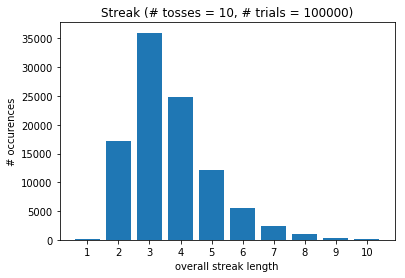

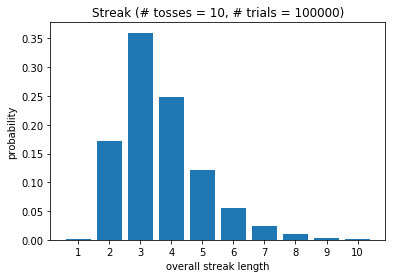

In [9]:
streak_distribution(10, 100000)

Counter({4: 27504, 5: 26550, 6: 17305, 3: 9809, 7: 9263, 8: 4852, 9: 2324, 10: 1114, 11: 544, 12: 250, 2: 245, 13: 129, 14: 61, 15: 29, 16: 11, 17: 4, 18: 3, 19: 2, 22: 1})


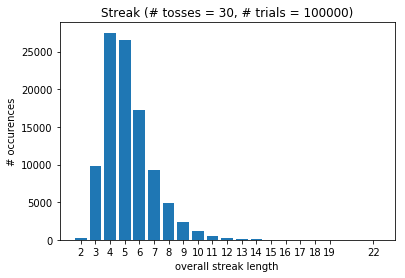

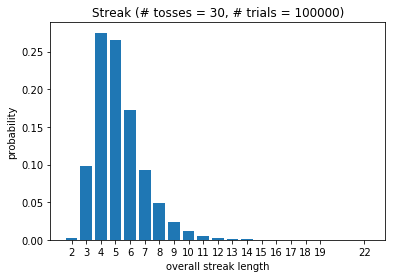

In [10]:
streak_distribution(30, 100000)

Counter({5: 27858, 6: 23291, 4: 16095, 7: 14685, 8: 8043, 9: 4014, 10: 2148, 3: 1875, 11: 1024, 12: 512, 13: 229, 14: 116, 15: 67, 16: 24, 17: 10, 2: 3, 21: 2, 20: 2, 18: 1, 19: 1})


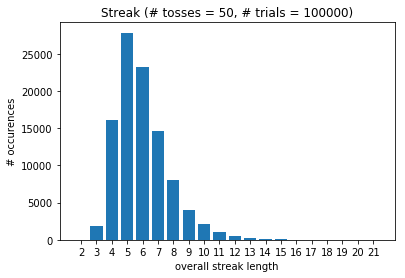

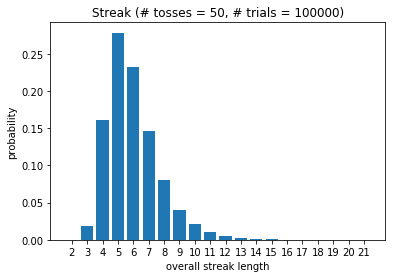

In [11]:
streak_distribution(50, 100000)

## Streak comparison: NBA vs random sequences

We now compare the streaks of the random coin tosses to the streaks of NBA players. We use the data from this [article](http://www.espn.com/nba/story/_/page/presents-19573519/heating-fire-klay-thompson-truth-hot-hand-nba).

**Caveat**: we mention at the outset that the comparison has a bit of an apples and oranges aspect. We are comparing the streaks of the NBA players that make n throws in total to a random sequence of length n. The two counts are a bit different due to the fact that the NBA players do not make n consecutive throws, and those throws are spread out over many matches. When the game clock runs out, the players' streaks are broken and thus we are counting that streak as a shorter streak, whereas had they played consecutively, they may have had a longer streak. Nevertheless, it is fun to make the comparison, as imperfect as it is.

**Caveat 2**: another caveat is that it is not specified how the streaks were counted in the data from the above article. The assumption we make here is that the streaks and shots were counted for each game and they were added together. This gives rise to the scenario above where the streaks are interrupted by the game clock. Another possibility is that the data collector stitched together the shot sequences from all the matches and computed the streak lengths of the resulting sequence, analogously to how we compute the streak lengths for the random sequences. I find this less likely, given the setup of the hot hand (a player warms up and starts making many shots in a row), since at the beginning of a new game he is not warmed up by the streak from the previous game.

In [18]:
# the data
# streak_counts[i] = number of streaks of length i
curry_streak_counts    = [0, 1439, 659, 291, 113, 47, 16, 5, 1, 0, 0, 0, 0, 0]
thompson_streak_counts = [0, 1284, 566, 245, 104, 50, 25, 14, 6, 3, 1, 1, 1, 1]
durant_streak_counts   = [0, 903, 442, 211, 95, 39, 23, 12, 5, 0, 0, 0, 0, 0]
james_streak_counts    = [0, 1410, 680, 311, 139, 58, 28, 16, 4, 3, 1, 0, 0, 0]
irving_streak_counts   = [0, 1196, 449, 203, 85, 38, 13, 8, 4, 2, 0, 0, 0, 0]
love_streak_counts     = [0, 858, 306, 119, 38, 13, 7, 3, 0, 0, 0, 0, 0, 0]

# field goals attempted (number of throws that were not free throws)
curry_fga = 5339
thompson_fga = 4987
durant_fga = 3409
james_fga = 5192
irving_fga = 4326
love_fga = 3172

In [13]:
# we now collect streak counts for random sequences

# returns a vector num_streaks
# num_streaks[i] = # of times a streak of H of length i appeared in a sequence of num_tosses
def random_num_streaks_single_trial(num_tosses):
    num_streaks = [0 for i in range(num_tosses + 1)]
    tosses = randint(0, 2, num_tosses)
    curr_streak = 0 # length of current streak (H or T)
    curr_face = tosses[0] # the face of the current streak
    for i in range(num_tosses):
        if curr_face == tosses[i]:
            # streak continues
            curr_streak += 1
        else:
            # streak broken
            if curr_face == 0:
                # streak of H, add it to the count
                num_streaks[curr_streak] += 1
            curr_streak = 1
            curr_face = tosses[i]
    if curr_face == 0:
        # streak of H, add it to the count
        num_streaks[curr_streak] += 1
    return num_streaks

# occurrences of each streak length in a random sequence, averaged over many trials
# returns a vector avg_num_streaks, where avg_num_streaks[i] = average number of streaks of H of length i
def random_num_streaks(num_tosses, num_trials = 10000):
    num_streaks = [0 for i in range(num_tosses + 1)]
    for i in range(num_trials):
        results = random_num_streaks_single_trial(num_tosses)
        for j in range(len(results)):
            num_streaks[j] += results[j]
    avg_num_streaks = [num_streaks[i]/num_trials for i in range(len(num_streaks))]
    return avg_num_streaks

In [14]:
print(random_num_streaks(10, 5))

[0.0, 1.0, 0.6, 0.2, 0.2, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0]


In [15]:
# NBA streaks vs random streaks

def player_vs_random(player_streak_counts, player_fga, player_name):
    num_tosses = player_fga
    # streak counts for random sequences
    random_streak_counts = random_num_streaks(num_tosses)
    x = [i for i in range(1, 14)]
    x1 = [i - 0.22 for i in range(1, 14)]
    x2 = [i + 0.22 for i in range(1, 14)]
    y1 = [player_streak_counts[i] for i in range(1, 14)]
    y2 = [random_streak_counts[i] for i in range(1, 14)]
    plt.bar(x1, y1, width=0.44, color='b',align='center', label=player_name)
    plt.bar(x2, y2, width=0.44, color='r',align='center', label='Random')
    plt.xticks(x, x)
    plt.legend(loc = 'upper right')
    plt.show()

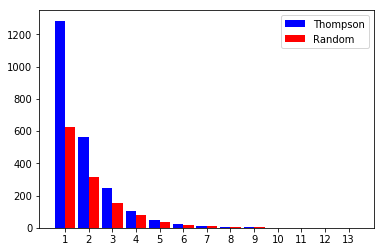

In [16]:
player_vs_random(thompson_streak_counts, thompson_fga, 'Thompson')

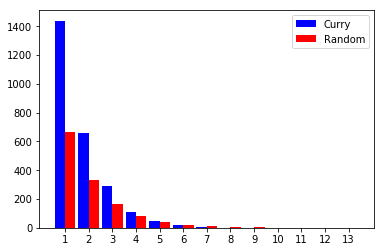

In [17]:
player_vs_random(curry_streak_counts, curry_fga, 'Curry')

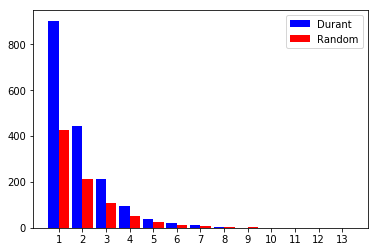

In [19]:
player_vs_random(durant_streak_counts, durant_fga, 'Durant')

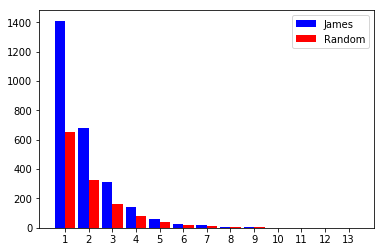

In [20]:
player_vs_random(james_streak_counts, james_fga, 'James')

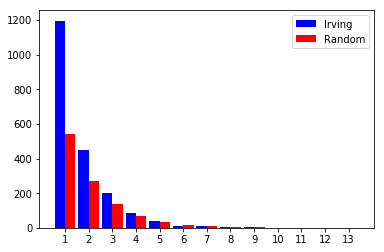

In [21]:
player_vs_random(irving_streak_counts, irving_fga, 'Irving')

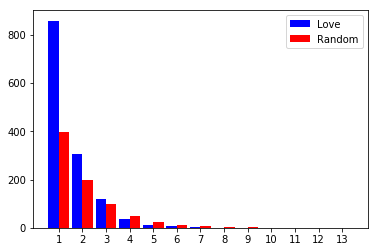

In [22]:
player_vs_random(love_streak_counts, love_fga, 'Love')